# Load Packages that will need:

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random

## Loading data into Pandas dataframe

***There are different types of formats that one can work with***

* Excel format
* Textfile format
* CSV format, e.t.c

We will use ***CSV*** format file

In [2]:
df = pd.read_csv('atomicMassData FOR NUCLEAR BINDING ENERGY EXERCISE.csv')

Below you can see how to **load** excel and textfile formats:

In [3]:
# df_xlsx = pd.read_excel('pokemon_data.xlsx')
# print(df_xlsx.head(3))

# df = pd.read_csv('pokemon_data.txt', delimiter='\t')
# print(df.head(5))

**The provided DataFrame contains data about various isotopes. Here's a brief explanation of each column:**

*    1nz: Identifier for the isotopes.
*    N: Number of neutrons.
*    Z: Number of protons (atomic number).
*    A: Mass number (total number of protons and neutrons).
*    EL: Element symbol.
*    MASSEXCESS: Mass excess in keV.
*    AtomicMass: Atomic mass in atomic mass units (amu).
*    BE: Binding energy per nucleon in keV.
*    BE_uncer: Uncertainty in the binding energy.

# Visualise the dataframe after loading data into pandas:

There are several ways to visualise the dataframe
* Visualise the entire dataframe: **df**
* Visualise the first '**N**' rows of the dataframe: **df.head(N)**
* Visualise the last '**M**' rows of the dataframe: **df.tail(M)**
* Visualise the dataframe through printing the dataframe: **print(df)**

In [39]:
df

1nz    N   Z    A  EL    MASSEXCESS  AtomicMass        BE  BE_uncer
0      -1    0   1    1  H     7288.97061    1.007825  7680.144  7680.144
1       1    1   0    1   n    8071.31713    1.008665  7073.915     0.000
2       0    1   1    2  H    13135.72176    2.014102     0.000     0.000
3      -1    1   2    3  He   14931.21793    3.016029  1112.283     0.000
4       1    2   1    3  H    14949.80993    3.016049  7976.206     0.000
...   ...  ...  ..  ...  ..           ...         ...       ...       ...
2493   48  156   8  264  Hs  119563.22200  264.128356  8268.527     6.865
2494   49  157   8  265  Hs  120900.28300  265.129792  8270.031     6.418
2495   50  158   8  266  Hs  121136.37300  266.130045  8068.672     5.718
2496   49  159  10  269  Ds  134834.70900  269.144751  8255.260     7.621
2497   50  160  10  270  Ds  134678.28200  270.144583  8276.439    14.660

[2498 rows x 9 columns]

In [40]:
df.head(5)

1nz  N  Z  A  EL   MASSEXCESS  AtomicMass        BE  BE_uncer
0   -1  0  1  1  H    7288.97061    1.007825  7680.144  7680.144
1    1  1  0  1   n   8071.31713    1.008665  7073.915     0.000
2    0  1  1  2  H   13135.72176    2.014102     0.000     0.000
3   -1  1  2  3  He  14931.21793    3.016029  1112.283     0.000
4    1  2  1  3  H   14949.80993    3.016049  7976.206     0.000

In [41]:
df.tail(5)

1nz    N   Z    A  EL  MASSEXCESS  AtomicMass        BE  BE_uncer
2493   48  156   8  264  Hs  119563.222  264.128356  8268.527     6.865
2494   49  157   8  265  Hs  120900.283  265.129792  8270.031     6.418
2495   50  158   8  266  Hs  121136.373  266.130045  8068.672     5.718
2496   49  159  10  269  Ds  134834.709  269.144751  8255.260     7.621
2497   50  160  10  270  Ds  134678.282  270.144583  8276.439    14.660

In [42]:
print(df)

      1nz    N   Z    A  EL    MASSEXCESS  AtomicMass        BE  BE_uncer
0      -1    0   1    1  H     7288.97061    1.007825  7680.144  7680.144
1       1    1   0    1   n    8071.31713    1.008665  7073.915     0.000
2       0    1   1    2  H    13135.72176    2.014102     0.000     0.000
3      -1    1   2    3  He   14931.21793    3.016029  1112.283     0.000
4       1    2   1    3  H    14949.80993    3.016049  7976.206     0.000
...   ...  ...  ..  ...  ..           ...         ...       ...       ...
2493   48  156   8  264  Hs  119563.22200  264.128356  8268.527     6.865
2494   49  157   8  265  Hs  120900.28300  265.129792  8270.031     6.418
2495   50  158   8  266  Hs  121136.37300  266.130045  8068.672     5.718
2496   49  159  10  269  Ds  134834.70900  269.144751  8255.260     7.621
2497   50  160  10  270  Ds  134678.28200  270.144583  8276.439    14.660

[2498 rows x 9 columns]


**Read the Columns (Headers) of the dataframe:**

In [43]:
print(df.columns)

Index(['1nz', 'N', 'Z', 'A', 'EL', 'MASSEXCESS', 'AtomicMass', 'BE',
       'BE_uncer'],
      dtype='object')


In [44]:
df.columns

Index(['1nz', 'N', 'Z', 'A', 'EL', 'MASSEXCESS', 'AtomicMass', 'BE',
       'BE_uncer'],
      dtype='object')

**You can read a single column of the dataframe:**
* Lets just read the Atomic mass column for example

In [45]:
print(df['AtomicMass'])

0         1.007825
1         1.008665
2         2.014102
3         3.016029
4         3.016049
           ...    
2493    264.128356
2494    265.129792
2495    266.130045
2496    269.144751
2497    270.144583
Name: AtomicMass, Length: 2498, dtype: float64


In [46]:
df.AtomicMass

0         1.007825
1         1.008665
2         2.014102
3         3.016029
4         3.016049
           ...    
2493    264.128356
2494    265.129792
2495    266.130045
2496    269.144751
2497    270.144583
Name: AtomicMass, Length: 2498, dtype: float64

**You can also read a group of columns that you want**
* Lets select **'N', 'Z', 'A', 'EL'**

In [47]:
print(df[['N', 'Z', 'A', 'EL']])

        N   Z    A  EL
0       0   1    1  H 
1       1   0    1   n
2       1   1    2  H 
3       1   2    3  He
4       2   1    3  H 
...   ...  ..  ...  ..
2493  156   8  264  Hs
2494  157   8  265  Hs
2495  158   8  266  Hs
2496  159  10  269  Ds
2497  160  10  270  Ds

[2498 rows x 4 columns]


**You can also look at a specific row on the dataframe individually**

* We use the individual location function called **'iloc'**

For example lets look at the 5th row of our dataframe:

In [48]:
print(df.iloc[4])

1nz                     1
N                       2
Z                       1
A                       3
EL                     H 
MASSEXCESS    14949.80993
AtomicMass       3.016049
BE               7976.206
BE_uncer              0.0
Name: 4, dtype: object


Say for example you are running an experiment and maybe after a couple of measurements you realise that the data was logged was incorrect. You know that after 5th measurement the data is correct, instead of deleating those rows, you can simple display the data thats correct using the iloc function using limits: **df.ioc["row to start": "row to end"]**

In [49]:
print(df.iloc[5:10])

   1nz  N  Z  A  EL   MASSEXCESS  AtomicMass        BE  BE_uncer
5    0  2  2  4  He   2424.91561    4.002603  7475.614       0.0
6    2  3  1  4  H   24621.12700    4.026432  2572.680       0.0
7   -2  1  3  4  Li  25323.18900    4.027186  7469.849       0.0
8    1  3  2  5  He  11231.23300    5.012057  2827.265       0.0
9   -1  2  3  5  Li  11678.88600    5.012538     0.000       0.0


You can also read a specific location. Using the dataframe above, we can identify the position of hydrogen in the 7th row: **df.iloc[row,column]**

In [50]:
print(df.iloc[6,4])

H 


You can also use a for loop to iterrate through the dataframe:

In [51]:
for i, j in df.iterrows():
    print(i, j['AtomicMass'])

0 1.0078250322
1 1.0086649158
2 2.0141017781
3 3.0160293226
4 3.0160492819
5 4.0026032541
6 4.026431868
7 4.027185562
8 5.012057224
9 5.0125378
10 5.035311493
11 6.0151228874
12 6.018885891
13 6.019726409
14 6.044955437
15 7.0160034366
16 7.016928717
17 7.027990654
18 7.029712
19 8.005305102
20 8.022486246
21 8.03393439
22 8.024607316
23 8.037643042
24 9.012183066
25 9.026790191
26 9.013329649
27 9.031037207
28 9.043946419
29 10.012936862
30 10.016853218
31 10.013534695
32 10.035483453
33 10.052815308
34 10.041653543
35 11.009305166
36 11.011432597
37 11.021661081
38 11.043723581
39 11.026090945
40 12.0
41 12.018613182
42 12.014352638
43 12.026922083
44 12.034261747
45 12.052613941
46 13.0033548352
47 13.005738609
48 13.017779981
49 13.024815437
50 13.036134507
51 13.061171503
52 14.0030740044
53 14.0032419884
54 14.008596706
55 14.025404012
56 14.034315199
57 14.04289292
58 15.0001088989
59 15.003065618
60 15.010599256
61 15.017785139
62 15.031087953
63 15.04317298
64 15.053490215
65 

1060 117.926559519
1061 117.905853839
1062 117.913074
1063 117.906921955
1064 117.930340443
1065 118.903311216
1066 118.905850944
1067 118.903945512
1068 118.906407148
1069 118.923340459
1070 118.932556952
1071 118.915410713
1072 118.92237733
1073 118.915570293
1074 118.910074
1075 118.909846903
1076 118.930659686
1077 119.902201873
1078 119.924551258
1079 119.904059514
1080 119.909868067
1081 119.918784767
1082 119.905079624
1083 119.920677279
1084 119.91178427
1085 119.910087465
1086 119.907966805
1087 119.926045
1088 120.904242792
1089 120.912963663
1090 120.903810093
1091 120.928950343
1092 120.907405255
1093 120.911453014
1094 120.920125282
1095 120.917227238
1096 120.904942488
1097 120.907851286
1098 120.924052289
1099 120.939613
1100 121.903043434
1101 121.913459052
1102 121.903444001
1103 121.905168074
1104 121.90758882
1105 121.908367658
1106 121.930631694
1107 121.919904
1108 121.916108145
1109 121.923664448
1110 121.910280966
1111 122.904269747
1112 122.904214016
1113 122.90

1558 157.929950979
1559 157.939870534
1560 157.927798581
1561 157.936565121
1562 157.949315626
1563 157.954801222
1564 157.936979525
1565 157.929893474
1566 157.928944692
1567 158.926396267
1568 158.925353933
1569 158.925746023
1570 158.927718768
1571 158.930690875
1572 158.929099612
1573 158.933217202
1574 158.939286479
1575 158.953995838
1576 158.940054787
1577 158.963028052
1578 158.934975
1579 158.946635615
1580 159.925203244
1581 159.927174778
1582 159.927061537
1583 159.935335286
1584 159.937559763
1585 159.931850916
1586 159.950682513
1587 159.928735204
1588 159.92907713
1589 159.935263106
1590 159.961541679
1591 159.946033
1592 159.968516753
1593 160.926939088
1594 160.927577001
1595 160.929676602
1596 160.927860759
1597 160.939160143
1598 160.930003191
1599 160.933664066
1600 160.937906846
1601 160.950279151
1602 160.958369031
1603 160.943572
1604 160.933549
1605 160.977627121
1606 161.926804168
1607 161.92878696
1608 161.929101485
1609 161.930992146
1610 161.947214896
1611 16

2263 221.021228
2264 221.015591199
2265 221.026323299
2266 221.021874846
2267 222.017576286
2268 222.015373355
2269 222.017843887
2270 222.01758262
2271 222.0184683
2272 222.022494
2273 222.02414
2274 222.026057953
2275 223.019734313
2276 223.018500719
2277 223.019136872
2278 223.021889285
2279 223.020811546
2280 223.025151
2281 223.023962232
2282 223.027737168
2283 224.020210453
2284 224.021722239
2285 224.02561721
2286 224.024095804
2287 224.021464157
2288 224.0233481
2289 224.029749
2290 224.027613974
2291 225.023610574
2292 225.023228647
2293 225.023950907
2294 225.029393555
2295 225.028485574
2296 225.025572478
2297 225.026130844
2298 225.033910797
2299 226.025408455
2300 226.026097069
2301 226.024903686
2302 226.029544515
2303 226.030861382
2304 226.027947872
2305 226.029338749
2306 227.027750666
2307 227.029176474
2308 227.027702618
2309 227.031865417
2310 227.028804477
2311 227.031181587
2312 227.035304396
2313 227.034956832
2314 228.028739835
2315 228.031068657
2316 228.031019

You can also get some statistics of your data,types of data, mean e.t.c

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1nz         2498 non-null   int64  
 1   N           2498 non-null   int64  
 2   Z           2498 non-null   int64  
 3   A           2498 non-null   int64  
 4   EL          2498 non-null   object 
 5   MASSEXCESS  2498 non-null   float64
 6   AtomicMass  2498 non-null   float64
 7   BE          2498 non-null   float64
 8   BE_uncer    2498 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 175.8+ KB


In [53]:
df.describe()

1nz            N            Z            A    MASSEXCESS  \
count  2498.000000  2498.000000  2498.000000  2498.000000    2498.00000   
mean     21.774620    76.921938    53.666133   132.069255  -38170.10753   
std      15.333068    39.514909    26.016565    65.057650   42841.05803   
min      -6.000000     0.000000     0.000000     1.000000  -91652.85300   
25%      10.000000    46.000000    34.000000    82.000000  -71626.16125   
50%      20.000000    78.000000    55.000000   134.000000  -51437.71450   
75%      32.000000   107.000000    76.000000   184.000000  -11567.73100   
max      59.000000   160.000000    99.000000   270.000000  134834.70900   

        AtomicMass           BE     BE_uncer  
count  2498.000000  2498.000000  2498.000000  
mean    132.028278  8051.281393     3.617565  
std      65.073947   728.199957   153.677587  
min       1.007825     0.000000     0.000000  
25%      81.916725  7819.362250     0.015000  
50%     133.919663  8184.204000     0.052000  
75%     183.959309  8450.522500     0.143000  
max     270.144583  8794.553000  7680.144000

In [54]:
df.describe(include='O')

EL
count   2498
unique   109
top       Xe
freq      38

You can also use **loc** function to filter your data. 
Using the results from  the cell above, we have only one column with objects in it. Let use **Xe** for example, say we want to see the dataframe for only **Xe**:

In [55]:
df.loc[df['EL'] == 'Xe']

1nz   N   Z    A  EL   MASSEXCESS  AtomicMass        BE  BE_uncer
951     1  55  54  109  Xe -46169.54800  108.950435  8176.705     0.023
964     2  56  54  110  Xe -51922.62500  109.944259  8505.101     0.059
978     3  57  54  111  Xe -54395.53400  110.941604  8194.639     0.024
985     4  58  54  112  Xe -60026.33800  111.935559  8488.331     0.038
996     5  59  54  113  Xe -62203.61800  112.933222  7840.597     0.019
1011    6  60  54  114  Xe -67085.89000  113.927980  8473.711     0.048
1022    7  61  54  115  Xe -68656.74800  114.926294  8663.932     0.059
1037    8  62  54  116  Xe -73046.72400  115.921581  7776.366     0.020
1047    9  63  54  117  Xe -74185.33700  116.920359  8084.463     0.025
1059   10  64  54  118  Xe -78079.05700  117.916179  8493.778     0.040
1071   11  65  54  119  Xe -78794.41300  118.915411  8402.552     0.048
1084   12  66  54  120  Xe -82172.42300  119.911784  7790.003     0.023
1093   13  67  54  121  Xe -82480.98600  120.911453  8132.392     0.032
1105   14  68  54  122  Xe -85354.97700  121.908368  7768.447     0.024
1116   15  69  54  123  Xe -85248.70100  122.908482  8614.866     0.054
1125   16  70  54  124  Xe -87661.42100  123.905892  8130.379     0.031
1136   17  71  54  125  Xe -87193.38100  124.906394  8493.130     0.048
1146   18  72  54  126  Xe -89146.96200  125.904297  8664.189     0.061
1157   19  73  54  127  Xe -88321.56000  126.905183  8091.041     0.032
1167   20  74  54  128  Xe -89860.29800  127.903531  7733.017     0.027
1178   21  75  54  129  Xe -88696.05896  128.904781  8144.625     0.037
1190   22  76  54  130  Xe -89880.46300  129.903509  8129.444     0.039
1203   23  77  54  131  Xe -88413.55800  130.905084  8241.346     0.042
1216   24  78  54  132  Xe -89278.96179  131.904155  7737.775     0.030
1232   25  79  54  133  Xe -87643.57100  132.905911  8010.512     0.046
1240   26  80  54  134  Xe -88125.82200  133.905393  8604.973     0.071
1258   27  81  54  135  Xe -86413.15100  134.907232  7719.038     0.035
1265   28  82  54  136  Xe -86429.15900  135.907214  7753.786     0.037
1277   29  83  54  137  Xe -82383.40400  136.911558  8370.395     0.052
1291   30  84  54  138  Xe -79972.23300  137.914146  7639.490     0.033
1305   31  85  54  139  Xe -75644.57600  138.918792  7827.440     0.038
1317   32  86  54  140  Xe -72986.45100  139.921646  8399.788     0.062
1331   33  87  54  141  Xe -68197.29900  140.926787  8462.066     0.067
1345   34  88  54  142  Xe -65229.63900  141.929973  7676.061     0.037
1360   35  89  54  143  Xe -60202.87300  142.935370  7841.634     0.042
1373   36  90  54  144  Xe -56872.29300  143.938945  8487.897     0.072
1391   37  91  54  145  Xe -51493.32900  144.944720  8492.897     0.081
1407   38  92  54  146  Xe -47954.94300  145.948518  7811.560     0.043

## Sorting Data

* You can sort your data in different ways, depending on how you want to see it.
* We can start of by sorting the EL column alphabetically:

In [56]:
df.sort_values('EL')

1nz    N   Z    A  EL   MASSEXCESS  AtomicMass        BE  BE_uncer
1       1    1   0    1   n   8071.31713    1.008665  7073.915     0.000
2277   45  134  89  223  Ac  17825.88200  223.019137  3507.630     5.385
2376   57  146  89  235  Ac  47357.15500  235.050840  8269.864     1.344
2253   42  131  89  220  Ac  13743.68200  220.014754  8038.338     0.355
2385   58  147  89  236  Ac  51220.99200  236.054988  8293.907     1.173
...   ...  ...  ..  ...  ..          ...         ...       ...       ...
844    21   61  40  101  Zr -73165.95700  100.921453  8255.364     0.020
911    26   66  40  106  Zr -58549.98700  105.937144  7629.874     0.014
924    27   67  40  107  Zr -54379.68800  106.941621  8610.004     0.034
652     4   44  40   84  Zr -71421.68600   83.923326  8389.770     0.014
829    20   60  40  100  Zr -76377.43700   99.918005  8193.227     0.067

[2498 rows x 9 columns]

In [57]:
df.sort_values('EL', ascending=False)

1nz    N   Z    A  EL   MASSEXCESS  AtomicMass        BE  BE_uncer
652     4   44  40   84  Zr -71421.68600   83.923326  8389.770     0.014
719    11   51  40   91  Zr -87895.56600   90.905640  8668.979     0.049
787    17   57  40   97  Zr -82942.66100   96.910957  8642.754     0.034
663     5   45  40   85  Zr -73175.18900   84.921443  7661.962     0.009
765    15   55  40   95  Zr -85659.94000   94.908040  8625.437     0.036
...   ...  ...  ..  ...  ..          ...         ...       ...       ...
2128   29  118  89  207  Ac  11146.23300  207.011966  8162.820     0.225
2119   28  117  89  206  Ac  13479.45200  206.014471  8393.929     0.453
2108   27  116  89  205  Ac  14106.69300  205.015144  7880.263     0.188
2159   32  121  89  210  Ac   8789.69900  210.009436  7674.005     0.180
1       1    1   0    1   n   8071.31713    1.008665  7073.915     0.000

[2498 rows x 9 columns]

* You can also use more than one column to sort your dataframe:

In [58]:
df.sort_values(['EL', 'AtomicMass'])

1nz    N   Z    A  EL   MASSEXCESS  AtomicMass        BE  BE_uncer
1       1    1   0    1   n   8071.31713    1.008665  7073.915     0.000
2108   27  116  89  205  Ac  14106.69300  205.015144  7880.263     0.188
2119   28  117  89  206  Ac  13479.45200  206.014471  8393.929     0.453
2128   29  118  89  207  Ac  11146.23300  207.011966  8162.820     0.225
2140   30  119  89  208  Ac  10753.23500  208.011544  8313.996     0.293
...   ...  ...  ..  ...  ..          ...         ...       ...       ...
867    23   63  40  103  Zr -67815.33400  102.927197  8231.043     0.020
882    24   64  40  104  Zr -65724.06000  103.929442  7655.662     0.014
894    25   65  40  105  Zr -61464.73400  104.934015  8435.990     0.025
911    26   66  40  106  Zr -58549.98700  105.937144  7629.874     0.014
924    27   67  40  107  Zr -54379.68800  106.941621  8610.004     0.034

[2498 rows x 9 columns]

Since we are using two columns to sort the data, we need to pass two entries in the ascending command. From the example below, one represents tru and zero represents false. One belongs to **EL** column, while zero belongs to **AtomicMass** column:

In [59]:
df.sort_values(['EL', 'AtomicMass'], ascending=[1,0])

1nz    N   Z    A  EL   MASSEXCESS  AtomicMass        BE  BE_uncer
1       1    1   0    1   n   8071.31713    1.008665  7073.915     0.000
2385   58  147  89  236  Ac  51220.99200  236.054988  8293.907     1.173
2376   57  146  89  235  Ac  47357.15500  235.050840  8269.864     1.344
2371   56  145  89  234  Ac  44841.19000  234.048139  8256.644     1.177
2360   55  144  89  233  Ac  41308.03300  233.044346  8097.475     0.747
...   ...  ...  ..  ...  ..          ...         ...       ...       ...
663     5   45  40   85  Zr -73175.18900   84.921443  7661.962     0.009
652     4   44  40   84  Zr -71421.68600   83.923326  8389.770     0.014
641     3   43  40   83  Zr -65911.65400   82.929241  7847.183     0.009
633     2   42  40   82  Zr -63631.28700   81.931689  7717.254     0.008
622     1   41  40   81  Zr -57460.13900   80.938314  7618.426     0.008

[2498 rows x 9 columns]

## Making changes to the data

You can make different changes to your dataframe. You can add (do any math calculation) two or more columns to create another column. In otherwords you can create another feature. This will be clear when dealing with the model section.

* We will start by adding the following columns together: **'N', 'Z', 'A'**

In [60]:
df['column1'] = df['N'] + df['Z'] + df['A']
df['column2'] = df['A'] - df['N']
df

1nz    N   Z    A  EL    MASSEXCESS  AtomicMass        BE  BE_uncer  \
0      -1    0   1    1  H     7288.97061    1.007825  7680.144  7680.144   
1       1    1   0    1   n    8071.31713    1.008665  7073.915     0.000   
2       0    1   1    2  H    13135.72176    2.014102     0.000     0.000   
3      -1    1   2    3  He   14931.21793    3.016029  1112.283     0.000   
4       1    2   1    3  H    14949.80993    3.016049  7976.206     0.000   
...   ...  ...  ..  ...  ..           ...         ...       ...       ...   
2493   48  156   8  264  Hs  119563.22200  264.128356  8268.527     6.865   
2494   49  157   8  265  Hs  120900.28300  265.129792  8270.031     6.418   
2495   50  158   8  266  Hs  121136.37300  266.130045  8068.672     5.718   
2496   49  159  10  269  Ds  134834.70900  269.144751  8255.260     7.621   
2497   50  160  10  270  Ds  134678.28200  270.144583  8276.439    14.660   

      column1  column2  
0           2        1  
1           2        0  
2           4        1  
3           6        2  
4           6        1  
...       ...      ...  
2493      428      108  
2494      430      108  
2495      432      108  
2496      438      110  
2497      440      110  

[2498 rows x 11 columns]

Say you want to drop a specific column from your dataframe, you can use the **drop** function. To demonstrate this, we will drop the two columns we created above:

In [61]:
df = df.drop(columns=['column1', 'column2'])
df

1nz    N   Z    A  EL    MASSEXCESS  AtomicMass        BE  BE_uncer
0      -1    0   1    1  H     7288.97061    1.007825  7680.144  7680.144
1       1    1   0    1   n    8071.31713    1.008665  7073.915     0.000
2       0    1   1    2  H    13135.72176    2.014102     0.000     0.000
3      -1    1   2    3  He   14931.21793    3.016029  1112.283     0.000
4       1    2   1    3  H    14949.80993    3.016049  7976.206     0.000
...   ...  ...  ..  ...  ..           ...         ...       ...       ...
2493   48  156   8  264  Hs  119563.22200  264.128356  8268.527     6.865
2494   49  157   8  265  Hs  120900.28300  265.129792  8270.031     6.418
2495   50  158   8  266  Hs  121136.37300  266.130045  8068.672     5.718
2496   49  159  10  269  Ds  134834.70900  269.144751  8255.260     7.621
2497   50  160  10  270  Ds  134678.28200  270.144583  8276.439    14.660

[2498 rows x 9 columns]

We can also use the **iloc** function to perform to this addition of columns: **iloc[rows: columns].sum(axis=0/1)**
* when axis=1, it sums horizotally.
* when axis=0, it sums vertically.

In [62]:
df['column1'] = df.iloc[:, 1:4].sum(axis=1)
df

1nz    N   Z    A  EL    MASSEXCESS  AtomicMass        BE  BE_uncer  \
0      -1    0   1    1  H     7288.97061    1.007825  7680.144  7680.144   
1       1    1   0    1   n    8071.31713    1.008665  7073.915     0.000   
2       0    1   1    2  H    13135.72176    2.014102     0.000     0.000   
3      -1    1   2    3  He   14931.21793    3.016029  1112.283     0.000   
4       1    2   1    3  H    14949.80993    3.016049  7976.206     0.000   
...   ...  ...  ..  ...  ..           ...         ...       ...       ...   
2493   48  156   8  264  Hs  119563.22200  264.128356  8268.527     6.865   
2494   49  157   8  265  Hs  120900.28300  265.129792  8270.031     6.418   
2495   50  158   8  266  Hs  121136.37300  266.130045  8068.672     5.718   
2496   49  159  10  269  Ds  134834.70900  269.144751  8255.260     7.621   
2497   50  160  10  270  Ds  134678.28200  270.144583  8276.439    14.660   

      column1  
0           2  
1           2  
2           4  
3           6  
4           6  
...       ...  
2493      428  
2494      430  
2495      432  
2496      438  
2497      440  

[2498 rows x 10 columns]

Instead of having a column being added at the far right of your dataframe, you can position it with the dataframe according to how you like:

In [63]:
cols = list(df.columns)
df = df[cols[0:4] + [cols[-1]] + cols[4:9]]

df.head(5)

1nz  N  Z  A  column1  EL   MASSEXCESS  AtomicMass        BE  BE_uncer
0   -1  0  1  1        2  H    7288.97061    1.007825  7680.144  7680.144
1    1  1  0  1        2   n   8071.31713    1.008665  7073.915     0.000
2    0  1  1  2        4  H   13135.72176    2.014102     0.000     0.000
3   -1  1  2  3        6  He  14931.21793    3.016029  1112.283     0.000
4    1  2  1  3        6  H   14949.80993    3.016049  7976.206     0.000

Since we have made changes to the dataframe, we can save the new version of the dataframe to maybe a CSV file or Excel file:
* When I do not use the **index=False**, the dataframe will be saved with double index

## Saving our Data (Exporting into Desired Format)

In [59]:
# df.to_csv('modified.csv', index=False)

#df.to_excel('modified.xlsx', index=False)

# df.to_csv('modified.txt', index=False, sep='\t')

## Filtering Data

You can use two columns to filter your data. For example, we can choose the type of **EL** we want and also apply the minum value of the **AtomicMass**:

In [82]:
new_df = df.loc[(df['EL'] == 'He') & (df['AtomicMass'] > 1)]

new_df.reset_index(drop=True, inplace=True)

new_df

# new_df.to_csv('filtered.csv')


1nz  N  Z   A  column1  EL   MASSEXCESS  AtomicMass        BE  BE_uncer
0   -1  1  2   3        6  He  14931.21793    3.016029  1112.283       0.0
1    0  2  2   4        8  He   2424.91561    4.002603  7475.614       0.0
2    1  3  2   5       10  He  11231.23300    5.012057  2827.265       0.0
3    2  4  2   6       12  He  17592.09500    6.018886  7699.460       0.0
4    3  5  2   7       14  He  26073.12600    7.027991  8493.129       0.0
5    4  6  2   8       16  He  31609.68100    8.033934  8111.493       0.0
6    5  7  2   9       18  He  40935.82600    9.043946  8557.025       0.0
7    6  8  2  10       20  He  49197.14300   10.052815  8431.390       0.0

In [83]:
new_df1 = df.loc[(df['EL'] == 'He') | (df['EL'] == 'Xe') & (df['AtomicMass'] > 1)]

new_df1.reset_index(drop=True, inplace=True)

new_df1

1nz   N   Z    A  column1  EL   MASSEXCESS  AtomicMass        BE  BE_uncer
0    -1   1   2    3        6  He  14931.21793    3.016029  1112.283     0.000
1     0   2   2    4        8  He   2424.91561    4.002603  7475.614     0.000
2     1   3   2    5       10  He  11231.23300    5.012057  2827.265     0.000
3     2   4   2    6       12  He  17592.09500    6.018886  7699.460     0.000
4     3   5   2    7       14  He  26073.12600    7.027991  8493.129     0.000
5     4   6   2    8       16  He  31609.68100    8.033934  8111.493     0.000
6     5   7   2    9       18  He  40935.82600    9.043946  8557.025     0.000
7     6   8   2   10       20  He  49197.14300   10.052815  8431.390     0.000
8     1  55  54  109      218  Xe -46169.54800  108.950435  8176.705     0.023
9     2  56  54  110      220  Xe -51922.62500  109.944259  8505.101     0.059
10    3  57  54  111      222  Xe -54395.53400  110.941604  8194.639     0.024
11    4  58  54  112      224  Xe -60026.33800  111.935559  8488.331     0.038
12    5  59  54  113      226  Xe -62203.61800  112.933222  7840.597     0.019
13    6  60  54  114      228  Xe -67085.89000  113.927980  8473.711     0.048
14    7  61  54  115      230  Xe -68656.74800  114.926294  8663.932     0.059
15    8  62  54  116      232  Xe -73046.72400  115.921581  7776.366     0.020
16    9  63  54  117      234  Xe -74185.33700  116.920359  8084.463     0.025
17   10  64  54  118      236  Xe -78079.05700  117.916179  8493.778     0.040
18   11  65  54  119      238  Xe -78794.41300  118.915411  8402.552     0.048
19   12  66  54  120      240  Xe -82172.42300  119.911784  7790.003     0.023
20   13  67  54  121      242  Xe -82480.98600  120.911453  8132.392     0.032
21   14  68  54  122      244  Xe -85354.97700  121.908368  7768.447     0.024
22   15  69  54  123      246  Xe -85248.70100  122.908482  8614.866     0.054
23   16  70  54  124      248  Xe -87661.42100  123.905892  8130.379     0.031
24   17  71  54  125      250  Xe -87193.38100  124.906394  8493.130     0.048
25   18  72  54  126      252  Xe -89146.96200  125.904297  8664.189     0.061
26   19  73  54  127      254  Xe -88321.56000  126.905183  8091.041     0.032
27   20  74  54  128      256  Xe -89860.29800  127.903531  7733.017     0.027
28   21  75  54  129      258  Xe -88696.05896  128.904781  8144.625     0.037
29   22  76  54  130      260  Xe -89880.46300  129.903509  8129.444     0.039
30   23  77  54  131      262  Xe -88413.55800  130.905084  8241.346     0.042
31   24  78  54  132      264  Xe -89278.96179  131.904155  7737.775     0.030
32   25  79  54  133      266  Xe -87643.57100  132.905911  8010.512     0.046
33   26  80  54  134      268  Xe -88125.82200  133.905393  8604.973     0.071
34   27  81  54  135      270  Xe -86413.15100  134.907232  7719.038     0.035
35   28  82  54  136      272  Xe -86429.15900  135.907214  7753.786     0.037
36   29  83  54  137      274  Xe -82383.40400  136.911558  8370.395     0.052
37   30  84  54  138      276  Xe -79972.23300  137.914146  7639.490     0.033
38   31  85  54  139      278  Xe -75644.57600  138.918792  7827.440     0.038
39   32  86  54  140      280  Xe -72986.45100  139.921646  8399.788     0.062
40   33  87  54  141      282  Xe -68197.29900  140.926787  8462.066     0.067
41   34  88  54  142      284  Xe -65229.63900  141.929973  7676.061     0.037
42   35  89  54  143      286  Xe -60202.87300  142.935370  7841.634     0.042
43   36  90  54  144      288  Xe -56872.29300  143.938945  8487.897     0.072
44   37  91  54  145      290  Xe -51493.32900  144.944720  8492.897     0.081
45   38  92  54  146      292  Xe -47954.94300  145.948518  7811.560     0.043

From the two cells above, we can see that we have created two new dataframes with 8 (new_df) & 46 (new_df1) rows from the 2498 entries of data.

You can also pass a string to get the data that has that specific string. Since we are dealing with data that contains one object, which is the elements of the periodic table. 
So we will use a string that contains one alphabet, instead of a word.

In [84]:
df.loc[df['EL'].str.contains('H')]

1nz    N   Z    A  column1  EL    MASSEXCESS  AtomicMass        BE  \
0      -1    0   1    1        2  H     7288.97061    1.007825  7680.144   
2       0    1   1    2        4  H    13135.72176    2.014102     0.000   
3      -1    1   2    3        6  He   14931.21793    3.016029  1112.283   
4       1    2   1    3        6  H    14949.80993    3.016049  7976.206   
5       0    2   2    4        8  He    2424.91561    4.002603  7475.614   
...   ...  ...  ..  ...      ...  ..           ...         ...       ...   
2127   47  127  80  207      414  Hg  -16487.44400  206.982300  8367.756   
2138   48  128  80  208      416  Hg  -13265.40600  207.985759  8267.555   
2493   48  156   8  264      428  Hs  119563.22200  264.128356  8268.527   
2494   49  157   8  265      430  Hs  120900.28300  265.129792  8270.031   
2495   50  158   8  266      432  Hs  121136.37300  266.130045  8068.672   

      BE_uncer  
0     7680.144  
2        0.000  
3        0.000  
4        0.000  
5        0.000  
...        ...  
2127     0.275  
2138     1.026  
2493     6.865  
2494     6.418  
2495     5.718  

[111 rows x 10 columns]

Then when you want to make the reverse of the above cell, you will just use **~**:

# Graphing the data in dataframe

***Visualization Ideas:***

*    **Scatter Plot of Binding Energy vs. Mass Number**:
        Visualize the relationship between the binding energy per nucleon (BE) and the mass number (A).

*    **Histogram of Mass Excess**:
        Plot the distribution of mass excess (MASSEXCESS) values.

*    **Box Plot of Atomic Mass by Element**:
        Compare the atomic masses (AtomicMass) across different elements (EL) using a box plot.

*    **Scatter Plot of Neutrons vs. Protons**:
        Visualize the relationship between the number of neutrons (N) and the number of protons (Z).

*    **Line Plot of Binding Energy Uncertainty**:
        Plot the binding energy uncertainty (BE_uncer) against the mass number (A) to observe how uncertainty varies with mass number.

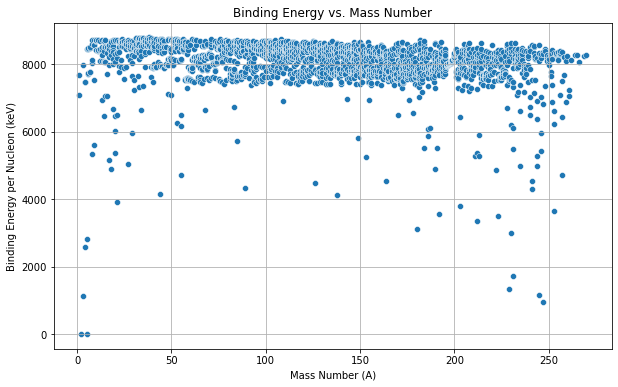

In [6]:
# Scatter Plot of Binding Energy vs. Mass Number
plt.figure(figsize=(10, 6))
sns.scatterplot(x='A', y='BE', data=df)
plt.title('Binding Energy vs. Mass Number')
plt.xlabel('Mass Number (A)')
plt.ylabel('Binding Energy per Nucleon (keV)')
plt.grid(True)
plt.show()

# Scatter Plot of Binding Energy vs. Mass Number
This scatter plot shows the relationship between the binding energy per nucleon and the mass number. The mass number (A) is the total number of protons and neutrons in the nucleus of an atom. The binding energy per nucleon (BE) is the energy required to separate a nucleon from the nucleus.

From the plot, you can observe how the binding energy per nucleon changes as the mass number increases. Typically, binding energy per nucleon peaks around iron (A ~ 56) and decreases for both lighter and heavier nuclei, indicating the stability of mid-sized nuclei.

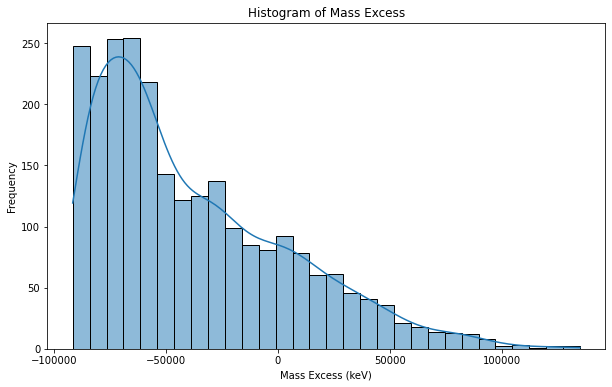

In [7]:
# Histogram of Mass Excess
plt.figure(figsize=(10, 6))
sns.histplot(df['MASSEXCESS'], bins=30, kde=True)
plt.title('Histogram of Mass Excess')
plt.xlabel('Mass Excess (keV)')
plt.ylabel('Frequency')
plt.show()

# Histogram of Mass Excess
This histogram displays the distribution of mass excess values in the dataset. Mass excess is the difference between the actual atomic mass and the mass number (A) of an isotope.

The histogram allows us to see the frequency of various mass excess values. It often shows a range of values centered around some mean, giving insights into how the mass excess is distributed among different isotopes.


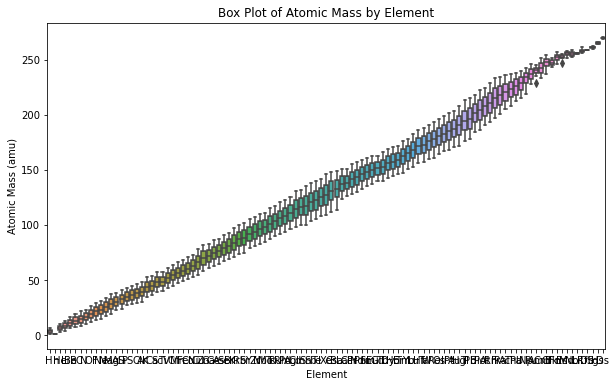

In [8]:
# Box Plot of Atomic Mass by Element
plt.figure(figsize=(10, 6))
sns.boxplot(x='EL', y='AtomicMass', data=df)
plt.title('Box Plot of Atomic Mass by Element')
plt.xlabel('Element')
plt.ylabel('Atomic Mass (amu)')
plt.show()

# Box Plot of Atomic Mass by Element
The box plot compares the atomic masses of different elements. Each box represents the distribution of atomic mass values for a particular element.

This plot helps in understanding the variability and central tendency of atomic mass within each element group. It also highlights any outliers that may exist.

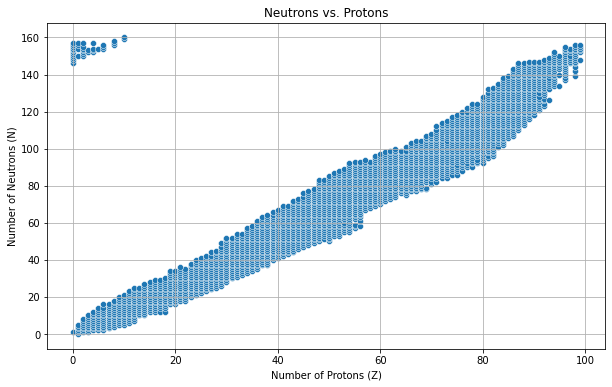

In [9]:
# Scatter Plot of Neutrons vs. Protons
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Z', y='N', data=df)
plt.title('Neutrons vs. Protons')
plt.xlabel('Number of Protons (Z)')
plt.ylabel('Number of Neutrons (N)')
plt.grid(True)
plt.show()

# Scatter Plot of Neutrons vs. Protons
This scatter plot shows the relationship between the number of neutrons (N) and the number of protons (Z) in the isotopes.

In a stable nucleus, the number of neutrons is typically similar to the number of protons for light elements, but for heavier elements, the number of neutrons usually exceeds the number of protons. This plot helps in visualizing these trends and identifying any deviations from the expected pattern.


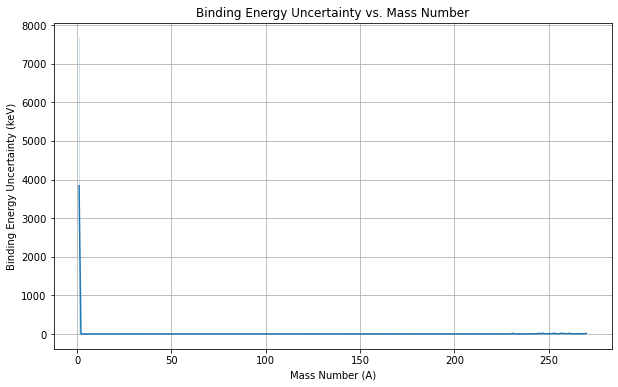

In [12]:
# Line Plot of Binding Energy Uncertainty
plt.figure(figsize=(10, 6))
sns.lineplot(x='A', y='BE_uncer', data=df)
plt.title('Binding Energy Uncertainty vs. Mass Number')
plt.xlabel('Mass Number (A)')
plt.ylabel('Binding Energy Uncertainty (keV)')
plt.grid(True)
plt.show()

# Line Plot of Binding Energy Uncertainty vs. Mass Number
This line plot illustrates how the uncertainty in binding energy per nucleon varies with the mass number.

The plot helps to identify any trends or patterns in the uncertainty of binding energy measurements across different isotopes. This is important for understanding the precision and reliability of the binding energy data.


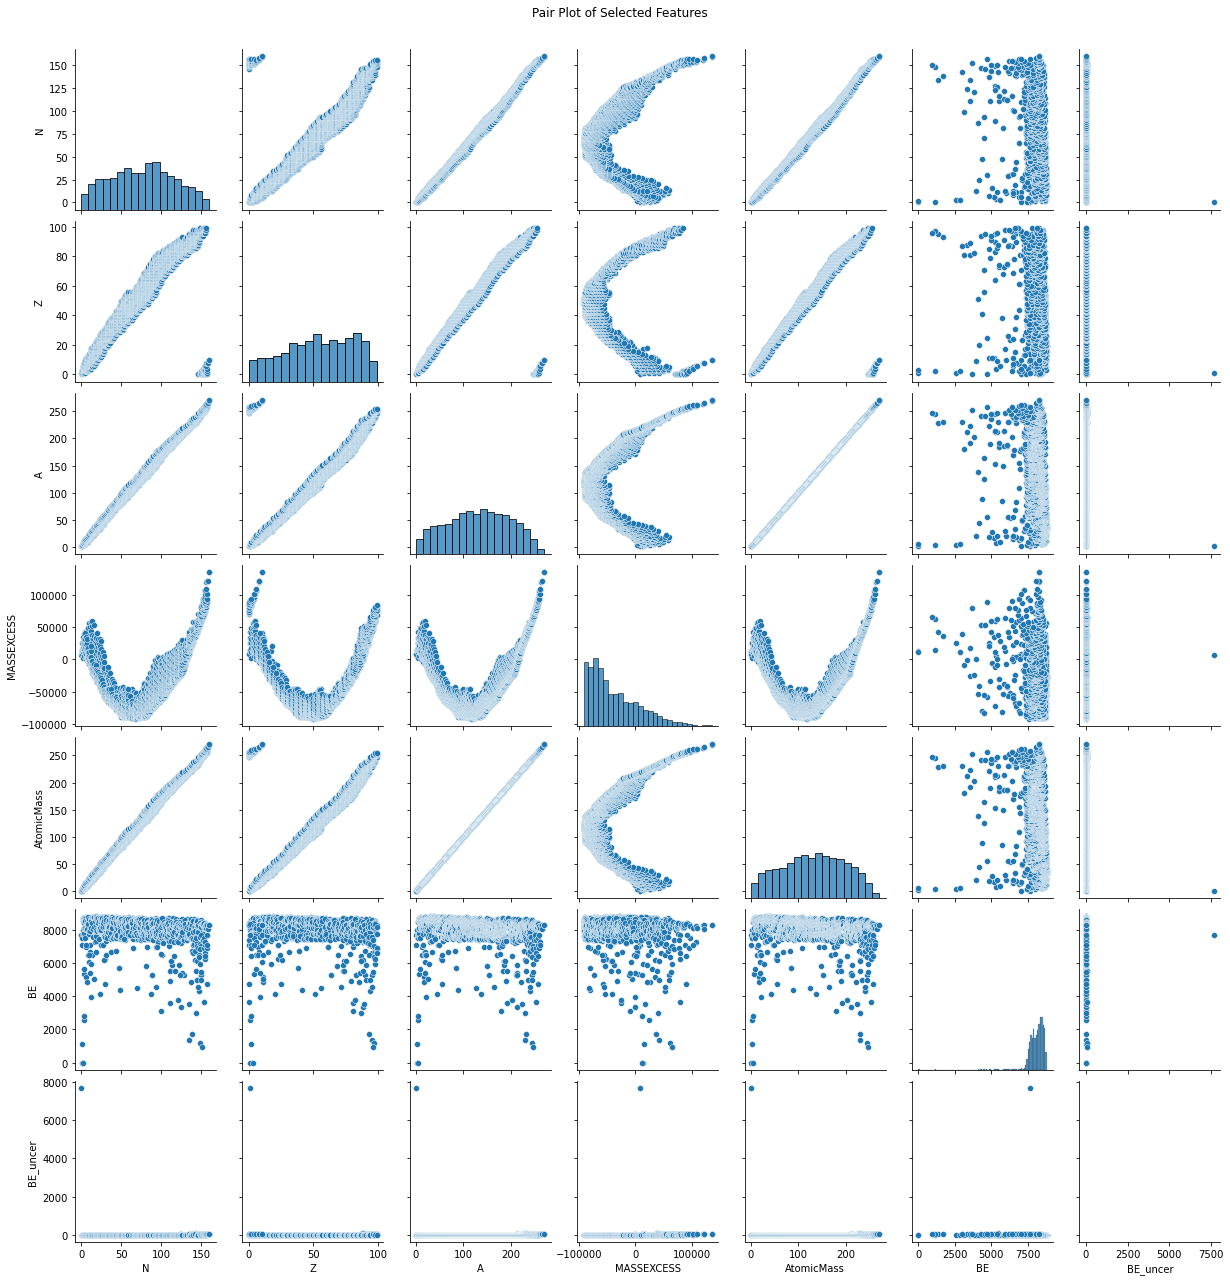

In [14]:
# Pair Plot
sns.pairplot(df[['N', 'Z', 'A', 'MASSEXCESS', 'AtomicMass', 'BE', 'BE_uncer']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Pair Plot
A pair plot allows us to visualize pairwise relationships between different variables in the dataset. It is particularly useful for identifying correlations and patterns among multiple features.


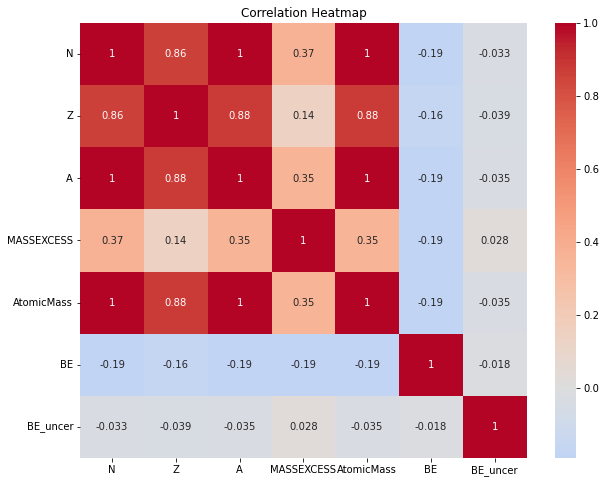

In [15]:
# Heatmap of Correlations
plt.figure(figsize=(10, 8))
corr_matrix = df[['N', 'Z', 'A', 'MASSEXCESS', 'AtomicMass', 'BE', 'BE_uncer']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Heatmap of Correlations
This heatmap shows the correlation between different numerical features in the dataset. Correlation values range from -1 to 1, where 1 indicates a perfect positive correlation and -1 indicates a perfect negative correlation. The heatmap helps identify which features are strongly correlated with each other.

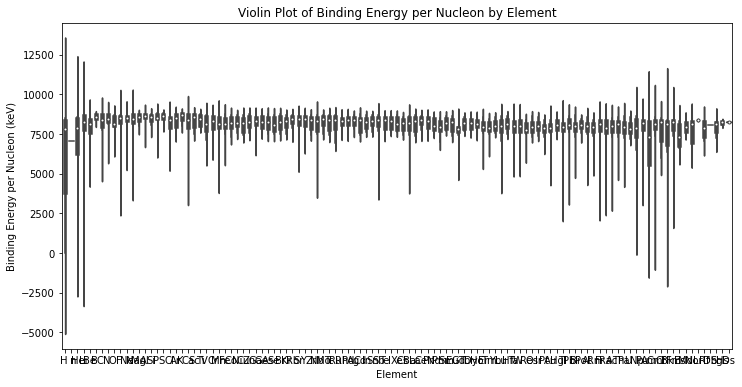

In [16]:
# Violin Plot of Binding Energy by Element
plt.figure(figsize=(12, 6))
sns.violinplot(x='EL', y='BE', data=df)
plt.title('Violin Plot of Binding Energy per Nucleon by Element')
plt.xlabel('Element')
plt.ylabel('Binding Energy per Nucleon (keV)')
plt.show()

# Violin Plot of Binding Energy by Element
A violin plot shows the distribution of binding energy per nucleon for different elements. It combines aspects of a box plot and a kernel density plot, providing a richer understanding of the data distribution.

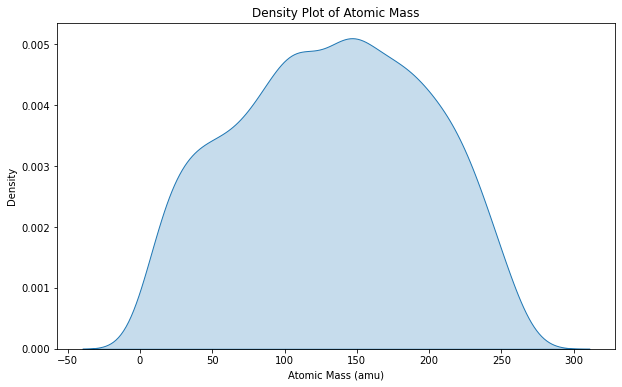

In [17]:
# Density Plot of Atomic Mass
plt.figure(figsize=(10, 6))
sns.kdeplot(df['AtomicMass'], shade=True)
plt.title('Density Plot of Atomic Mass')
plt.xlabel('Atomic Mass (amu)')
plt.ylabel('Density')
plt.show()

# Density Plot of Atomic Mass
A density plot visualizes the distribution of atomic mass values in the dataset. It provides a smoothed version of the histogram, allowing us to see the distribution pattern more clearly.

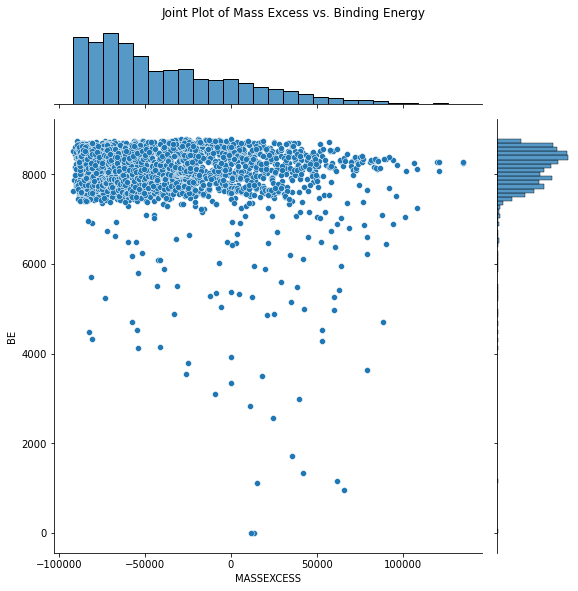

In [18]:
# Joint Plot of Mass Excess vs. Binding Energy
sns.jointplot(x='MASSEXCESS', y='BE', data=df, kind='scatter', height=8)
plt.suptitle('Joint Plot of Mass Excess vs. Binding Energy', y=1.02)
plt.show()

# Joint Plot of Mass Excess vs. Binding Energy
A joint plot allows us to explore the relationship between mass excess and binding energy per nucleon. It combines a scatter plot with histograms or density plots of the individual variables.

We perform Linear Regression on **Z** and **N**:

In [32]:
x1 = df['Z'].values.reshape(-1,1)
y1 = df['N']

In [33]:
RegLin = LinearRegression() #Linear regression function
RegLin.fit(x1,y1)

LinearRegression()

In [34]:
print(f'Coefficient: {RegLin.coef_[0]}')
print(f'Intercept: {RegLin.intercept_}')

Coefficient: 1.3081794461594696
Intercept: 6.71700552712322


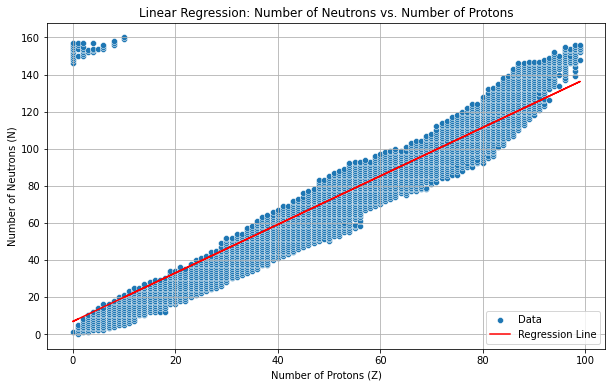

In [35]:
# Predict values
y_pred = RegLin.predict(x1)

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Z', y='N', data=df, label='Data')
plt.plot(df['Z'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Number of Neutrons vs. Number of Protons')
plt.xlabel('Number of Protons (Z)')
plt.ylabel('Number of Neutrons (N)')
plt.legend()
plt.grid(True)
plt.show()

# Linear Regression: Number of Neutrons vs. Number of Protons
This plot visualizes the linear regression model fitted to the relationship between the number of protons (Z) and the number of neutrons (N) in the isotopes. The scatter plot shows the original data points, while the red line represents the fitted linear regression line. The slope (coefficient) and intercept of the regression line indicate the linear relationship between the two variables.


In [37]:
# Print the intercept and coefficient
print('The intercept a: \n', RegLin.intercept_)
print('Coefficient b : \n', RegLin.coef_)

# Calculate and print various error metrics
print("Mean squared error: %.2f" % mean_squared_error(y1, y_pred))
print('Variance score: %.2f' % r2_score(y1, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y1, y_pred))
print('Mean squared log error: %.2f' % mean_squared_log_error(y1, y_pred))


The intercept a: 
 6.71700552712322
Coefficient b : 
 [1.30817945]
Mean squared error: 402.93
Variance score: 0.74
Mean absolute error: 10.36
Mean squared log error: 0.17


# Linear Regression: Number of Neutrons vs. Number of Protons

This code performs a linear regression on the dataset with 'Z' (number of protons) and 'N' (number of neutrons). The linear regression model is fitted to the data, and various error metrics are calculated to evaluate the model's performance:

- **Mean Squared Error (MSE)**: The average of the squared differences between the actual and predicted values.
- **R-squared Score (R²)**: The proportion of the variance in the dependent variable that is predictable from the independent variable(s). A value of 1 indicates a perfect fit.
- **Mean Absolute Error (MAE)**: The average of the absolute differences between the actual and predicted values.
- **Mean Squared Log Error (MSLE)**: The average of the squared logarithmic differences between the actual and predicted values.

The scatter plot below shows the actual data points in blue and the fitted linear regression line in red.
